#### Config

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/IW2_LIACC

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1zeSTEyXHEybPFlD6lBhfLhXgf0Phc8qC/IW2_LIACC


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
import re 
import datetime
from scipy import signal
from pandas.core import resample

### dataset

In [187]:
def get_dataset_raw_signal_resampling (users_list = ['1','9', '8', '7', '3', '4', '5', '2', '6', '10', '11', '12'],
                 folders_list = ['DatasetC'],
                 #, 'DatasetB', 'DatasetC'],
                 path = '/content/drive/MyDrive/IW2_LIACC/IW_NeuroSky/',
                 signal_name ='rawEEG'):

  '''
  to prepaire the dataset.

  users = list of users like [1,2,3,7]
  series = list of dataset names like ['DatasetA', 'DatasetB']

  '''

  data = pd.DataFrame()
  user_labels = pd.DataFrame()
  all_labels = pd.DataFrame()

  for folder_name in folders_list:

    _, dirs, _ = next(os.walk(path+folder_name))

    existed_files = set(dirs) & set(users_list)

    labels = pd.read_csv(path+folder_name+'/Labels.csv')
    labels.set_index (['File'], inplace=True)

    for user_name in existed_files:
      
      temp = path + folder_name + '/' + user_name
      _, _, files = next(os.walk(temp))

      if len (files) == 0:
        continue

      for file_name in files:

        temp = path + folder_name + '/' + user_name + '/' + file_name

        #print (temp)
        
        temp_dataset = pd.read_csv(temp)
        temp_dataset['time'] = pd.to_datetime(temp_dataset['time'], format='%H:%M:%S')
        temp_dataset['second'] = temp_dataset['time'].dt.second

        for sec in temp_dataset['second'].unique():

          boolian_mask = (temp_dataset['second']==sec).to_list()
          a_sec = temp_dataset.iloc[boolian_mask]
          resampled_data = signal.resample( a_sec[signal_name] , 128)
          resampled_data = resampled_data.reshape (1,-1)
          resampled_data_df = pd.DataFrame(resampled_data)
          shape_t = resampled_data_df.shape[1]
          user_labels = pd.DataFrame({'label': [labels['Label'][file_name]]*shape_t})
          resampled_data_df['label'] = user_labels

          #all_labels = pd.concat([all_labels, user_labels], axis =1)
          data = pd.concat([data, resampled_data_df], axis =0, ignore_index=True)



  return data

In [188]:
dataset = get_dataset_raw_signal_resampling(users_list = ['1','9', '8', '7', '3', '4', '5', '2', '6', '10', '11', '12']
                                            , folders_list = ['DatasetC'])
dataset 

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,label
0,41.000000,42.546125,43.045797,42.701073,41.802934,40.694656,39.731803,39.243065,39.495854,40.669879,...,6.844705,7.706986,10.378264,14.441279,19.399664,24.729231,29.929259,34.568769,38.323447,Front
1,45.000000,52.708876,70.437977,90.054365,101.717719,98.934529,82.098949,58.591019,39.258547,33.014222,...,13.521879,22.483162,39.531781,59.737979,75.940606,82.081693,76.454214,63.013167,49.792390,Front
2,41.000000,49.164644,51.428260,45.905829,34.442936,22.108034,14.880920,16.657906,27.166363,41.971946,...,63.662769,54.158583,45.624184,37.796864,30.489548,24.544499,21.801802,23.983230,31.178624,Front
3,40.000000,37.817614,34.800128,30.123212,24.000000,18.090014,15.110910,17.696330,27.000000,41.771437,...,75.077074,69.000000,63.936015,59.957354,56.516892,53.000000,49.216675,45.504790,42.381985,Front
4,65.000000,51.288682,41.349559,39.653145,46.092762,56.104337,63.312761,63.196551,55.673788,45.126278,...,63.149857,58.585622,52.194804,49.259012,53.047314,62.644955,73.269232,78.928782,75.900853,Front
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,-101.885230,-242.146529,-187.219525,-164.473621,-116.481182,-93.461269,-69.089268,-80.713316,-36.049572,-33.784489,...,76.186646,67.592908,76.698319,66.936570,77.467444,66.383430,62.381520,34.722206,77.822265,Right
1166,63.704777,90.304926,122.590676,87.441410,91.100444,76.135627,69.860848,53.374035,54.720587,51.268344,...,47.921342,50.088234,51.042667,47.867287,53.647917,42.866890,66.758290,53.567237,64.175882,Right
1167,39.805320,79.073144,66.983137,43.370414,61.379606,42.299938,89.705466,52.775673,56.797263,48.666262,...,39.087654,28.987721,50.611893,56.083655,44.091917,32.138701,46.285894,30.341272,43.640867,Right
1168,33.455700,39.297654,114.674082,110.834222,84.698604,124.813189,143.406957,111.767886,73.415082,57.129309,...,33.805704,34.170843,29.565120,34.661927,33.057977,35.397227,31.616844,42.003038,66.987654,Right


In [122]:
dataset['label'].value_counts()

Left     418
Front    396
Stop     330
Right    281
Name: label, dtype: int64

### filter

In [189]:
from scipy.signal import butter, lfilter
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz
import pandas as pd
import csv
import statistics 
from scipy import signal
from datetime import datetime
from math import factorial
from sklearn import preprocessing

#butter_bandpass to remove noise
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Normalization
def feature_normalize(dataset): 
    return (dataset - min(dataset))/(max(dataset) - min(dataset))


def preprocessing_data_raw(raw_data, fs, order=5):  # Apply a bandpass filter on the raw eeg
    label = raw_data['label']
    data = raw_data.drop(['label'], axis=1)
    data = butter_bandpass_filter(data, 4, 45 , fs , order=order)
    temp = pd.DataFrame(data)
    temp['label'] = label
    return temp



In [190]:
fs=128
dataset = preprocessing_data_raw (dataset, fs=fs)


### functions for feature extraction

In [191]:
data_fea_ext = pd.DataFrame()
dataset_no_label = dataset.drop('label', axis =1)

#### helper

In [192]:
# helper
#@jit('UniTuple(float64, 2)(float64[:], float64[:])', nopython=True)
def _linear_regression(x, y):
    """Fast linear regression using Numba.

    Parameters
    ----------
    x, y : ndarray, shape (n_times,)
        Variables

    Returns
    -------
    slope : float
        Slope of 1D least-square regression.
    intercept : float
        Intercept
    """
    n_times = x.size
    sx2 = 0
    sx = 0
    sy = 0
    sxy = 0
    for j in range(n_times):
        sx2 += x[j] ** 2
        sx += x[j]
        sxy += x[j] * y[j]
        sy += y[j]
    den = n_times * sx2 - (sx ** 2)
    num = n_times * sxy - sx * sy
    slope = num / den
    intercept = np.mean(y) - slope * np.mean(x)
    return slope, intercept 


#@jit('i8[:](f8, f8, f8)', nopython=True)
def _log_n(min_n, max_n, factor):
    """
    Creates a list of integer values by successively multiplying a minimum
    value min_n by a factor > 1 until a maximum value max_n is reached.

    Used for detrended fluctuation analysis (DFA).

    Function taken from the nolds python package
    (https://github.com/CSchoel/nolds) by Christopher Scholzel.

    Parameters
    ----------
    min_n (float):
        minimum value (must be < max_n)
    max_n (float):
        maximum value (must be > min_n)
    factor (float):
       factor used to increase min_n (must be > 1)

    Returns
    -------
    list of integers:
        min_n, min_n * factor, min_n * factor^2, ... min_n * factor^i < max_n
        without duplicates
    """
    max_i = int(floor(log(1.0 * max_n / min_n) / log(factor)))
    ns = [min_n]
    for i in range(max_i + 1):
        n = int(floor(min_n * (factor ** i)))
        if n > ns[-1]:
            ns.append(n)
    return np.array(ns, dtype=np.int64)


def _app_samp_entropy(x, order, metric='chebyshev', approximate=True):
    """Utility function for `app_entropy`` and `sample_entropy`.
    """
    _all_metrics = KDTree.valid_metrics
    if metric not in _all_metrics:
        raise ValueError('The given metric (%s) is not valid. The valid '
                         'metric names are: %s' % (metric, _all_metrics))
    phi = np.zeros(2)
    r = 0.2 * np.std(x, ddof=0)

    # compute phi(order, r)
    _emb_data1 = _embed(x, order, 1)
    if approximate:
        emb_data1 = _emb_data1
    else:
        emb_data1 = _emb_data1[:-1]
    count1 = KDTree(emb_data1, metric=metric).query_radius(emb_data1, r,
                                                           count_only=True
                                                           ).astype(np.float64)
    # compute phi(order + 1, r)
    emb_data2 = _embed(x, order + 1, 1)
    count2 = KDTree(emb_data2, metric=metric).query_radius(emb_data2, r,
                                                           count_only=True
                                                           ).astype(np.float64)
    if approximate:
        phi[0] = np.mean(np.log(count1 / emb_data1.shape[0]))
        phi[1] = np.mean(np.log(count2 / emb_data2.shape[0]))
    else:
        phi[0] = np.mean((count1 - 1) / (emb_data1.shape[0] - 1))
        phi[1] = np.mean((count2 - 1) / (emb_data2.shape[0] - 1))
    return phi


##@jit('f8(f8[:], i4, f8)', nopython=True)
def _numba_sampen(x, order, r):
    """
    Fast evaluation of the sample entropy using Numba.
    """
    n = x.size
    n1 = n - 1
    order += 1
    order_dbld = 2 * order

    # Define threshold
    # r *= x.std()

    # initialize the lists
    run = [0] * n
    run1 = run[:]
    r1 = [0] * (n * order_dbld)
    a = [0] * order
    b = a[:]
    p = a[:]

    for i in range(n1):
        nj = n1 - i

        for jj in range(nj):
            j = jj + i + 1
            if abs(x[j] - x[i]) < r:
                run[jj] = run1[jj] + 1
                m1 = order if order < run[jj] else run[jj]
                for m in range(m1):
                    a[m] += 1
                    if j < n1:
                        b[m] += 1
            else:
                run[jj] = 0
        for j in range(order_dbld):
            run1[j] = run[j]
            r1[i + n * j] = run[j]
        if nj > order_dbld - 1:
            for j in range(order_dbld, nj):
                run1[j] = run[j]

    m = order - 1

    while m > 0:
        b[m] = b[m - 1]
        m -= 1

    b[0] = n * n1 / 2
    a = np.array([float(aa) for aa in a])
    b = np.array([float(bb) for bb in b])
    p = np.true_divide(a, b)
    return -log(p[-1])



In [193]:
def _dfa(x):
    """
    Utility function for detrended fluctuation analysis
    """
    N = len(x)
    nvals = _log_n(4, 0.1 * N, 1.2)
    walk = np.cumsum(x - x.mean())
    fluctuations = np.zeros(len(nvals))

    for i_n, n in enumerate(nvals):
        d = np.reshape(walk[:N - (N % n)], (N // n, n))
        ran_n = np.array([float(na) for na in range(n)])
        d_len = len(d)
        trend = np.empty((d_len, ran_n.size))
        for i in range(d_len):
            slope, intercept = _linear_regression(ran_n, d[i])
            trend[i, :] = intercept + slope * ran_n
        # Calculate root mean squares of walks in d around trend
        # Note that np.mean on specific axis is not supported by Numba
        flucs = np.sum((d - trend) ** 2, axis=1) / n
        # https://github.com/neuropsychology/NeuroKit/issues/206
        fluctuations[i_n] = np.sqrt(np.mean(flucs))

    # Filter zero
    nonzero = np.nonzero(fluctuations)[0]
    fluctuations = fluctuations[nonzero]
    nvals = nvals[nonzero]
    if len(fluctuations) == 0:
        # all fluctuations are zero => we cannot fit a line
        dfa = np.nan
    else:
        dfa, _ = _linear_regression(np.log(nvals), np.log(fluctuations))
    return dfa

#### statistics

In [194]:
def mean(x):
  return np.mean(x)

def var(x):
  return np.std(x)

def skewness (x):

  N = x.shape[0]
  row_mean = np.mean(x)
  row = np.array(x)

  num = np.sum(np.power((row - row_mean), 3))*1/N
  dnom_0 = np.sum(np.power((row - row_mean), 2))*(1/(N-1))
  dnom = np.power(dnom_0,3/2)

  return num/dnom


def kurtosis (x):

  N = x.shape[0]
  row_mean = np.mean(x)
  row = np.array(x)

  num = np.sum(np.power((row - row_mean), 4))*1/N
  dnom_0 = np.sum(np.power((row - row_mean), 2))*1/N
  dnom = np.power(dnom_0, 2)

  return num/dnom


def hjorth_parameters(d):
  
    """Hjorth parameters
    Parameters
    ----------
    d : 
      Time series data 
    
    Returns
    -------
    activity, complexity and mobility 
    
    Notes
    -----"""  

    #Compute Hjorth parameters

    first_deriv = np.diff(d)
    second_deriv = np.diff(d,2)

    var_zero = np.mean(d ** 2)
    var_d1 = np.mean(first_deriv ** 2)
    var_d2 = np.mean(second_deriv ** 2)

    activity = var_zero
    mobility = np.sqrt(var_d1 / var_zero)
    complexity = np.sqrt(var_d2 / var_d1) / mobility

    return activity, mobility, complexity

  
def hjorth_activity (d):
    
    activity, _, _ = hjorth_parameters(d)

    return activity


def hjorth_mobilty (d):
    
    _, mobility, _ = hjorth_parameters(d)

    return mobility


def hjorth_complexity (d):
    
    _, _, complexity = hjorth_parameters(d)

    return complexity


def feature_normalize(x): 

    return (x - min(x))/(max(x) - min(x))


def abs_mean (x):

  abs_mean = np.mean(np.absolute(feature_normalize(x) - np.mean(feature_normalize(x))))
  
  return abs_mean

In [195]:
def _embed(x, order=3, delay=1):
    """Time-delay embedding.

    Parameters
    ----------
    x : 1d-array
        Time series, of shape (n_times)
    order : int
        Embedding dimension (order).
    delay : int
        Delay.

    Returns
    -------
    embedded : ndarray
        Embedded time-series, of shape (n_times - (order - 1) * delay, order)
    """
    N = len(x)
    if order * delay > N:
        raise ValueError("Error: order * delay should be lower than x.size")
    if delay < 1:
        raise ValueError("Delay has to be at least 1.")
    if order < 2:
        raise ValueError("Order has to be at least 2.")
    Y = np.zeros((order, N - (order - 1) * delay))
    for i in range(order):
        Y[i] = x[(i * delay):(i * delay + Y.shape[1])]
    return Y.T

In [196]:
stat_features = ['mean', 'var', 'skewness', 'kurtosis', 'hjorth_activity', 'hjorth_complexity', 'abs_mean']

In [197]:
for fea in stat_features:
  data_fea_ext [fea] =  dataset_no_label.apply (eval(fea), axis=1)

In [198]:
data_fea_ext

,mean,var,skewness,kurtosis,hjorth_activity,hjorth_complexity,abs_mean
0,0.906337,12.648796,0.080278,2.726475,160.813488,2.275837,0.173152
1,0.349914,24.540056,0.437171,2.374193,602.336785,1.323414,0.184933
2,-0.745644,22.151344,0.028848,2.300574,491.238019,1.266088,0.190419
3,0.140393,13.485746,-0.446317,2.358629,181.885066,1.382428,0.193578
4,0.160262,20.237561,0.266532,3.110012,409.584568,1.792435,0.156823
...,...,...,...,...,...,...,...
1165,-0.391626,32.502665,0.280404,5.127180,1056.576632,1.749783,0.106193
1166,0.023503,21.264484,-0.296661,2.965234,452.178842,1.578498,0.153796
1167,0.136342,16.902793,0.039443,3.126609,285.722997,1.339403,0.144355
1168,-0.000059,31.822276,-0.350524,4.306231,1012.657277,1.817959,0.114447


#### FD

In [199]:
import numpy as np
from numba import jit
from math import log, floor

#from .utils import _linear_regression, _log_n
# all = ['petrosian_fd', 'katz_fd', 'higuchi_fd', 'detrended_fluctuation']


def petrosian_fd(x):
  
    n = len(x)
    # Number of sign changes in the first derivative of the signal
    diff = np.ediff1d(x)
    N_delta = (diff[1:-1] * diff[0:-2] < 0).sum()
    
    return np.log10(n) / (np.log10(n) + np.log10(n / (n + 0.4 * N_delta)))


def katz_fd(x):

    x = np.array(x)
    dists = np.abs(np.ediff1d(x))
    ll = dists.sum()
    ln = np.log10(np.divide(ll, dists.mean()))
    aux_d = x - x[0]
    d = np.max(np.abs(aux_d[1:]))

    return np.divide(ln, np.add(ln, np.log10(np.divide(d, ll))))


#@jit('float64(float64[:], int32)')
def _higuchi_fd(x, kmax):

    """Utility function for `higuchi_fd`.
    """
    n_times = x.size
    lk = np.empty(kmax)
    x_reg = np.empty(kmax)
    y_reg = np.empty(kmax)
    for k in range(1, kmax + 1):
        lm = np.empty((k,))
        for m in range(k):
            ll = 0
            n_max = floor((n_times - m - 1) / k)
            n_max = int(n_max)
            for j in range(1, n_max):
                ll += abs(x[m + j * k] - x[m + (j - 1) * k])
            ll /= k
            ll *= (n_times - 1) / (k * n_max)
            lm[m] = ll
        # Mean of lm
        m_lm = 0
        for m in range(k):
            m_lm += lm[m]
        m_lm /= k
        lk[k - 1] = m_lm
        x_reg[k - 1] = log(1. / k)
        y_reg[k - 1] = log(m_lm)
    higuchi, _ = _linear_regression(x_reg, y_reg)
    return higuchi


def higuchi_fd(x, kmax=10):
    x = np.asarray(x, dtype=np.float64)
    kmax = int(kmax)
    return _higuchi_fd(x, kmax)


def detrended_fluctuation(x):
    x = np.asarray(x, dtype=np.float64)
    return _dfa(x)


In [200]:
fd_features = ['petrosian_fd', 'katz_fd', 'higuchi_fd', 'detrended_fluctuation']

for fea in fd_features:
  data_fea_ext [fea] =  dataset_no_label.apply (eval(fea), axis=1)

#### entropy

In [201]:
import numpy as np
from numba import jit
from math import factorial, log
from sklearn.neighbors import KDTree
from scipy.signal import periodogram, welch

all = ['perm_entropy', 'spectral_entropy', 'svd_entropy', 'app_entropy',
       'sample_entropy', 'lziv_complexity']


def perm_entropy(x, order=3, delay=1, normalize=False):
    """Permutation Entropy.

    Parameters
    ----------
    x : list or np.array
        One-dimensional time series of shape (n_times)
    order : int
        Order of permutation entropy. Default is 3.
    delay : int
        Time delay (lag). Default is 1.
    normalize : bool
        If True, divide by log2(order!) to normalize the entropy between 0
        and 1. Otherwise, return the permutation entropy in bit.

    Returns
    -------
    pe : float
        Permutation Entropy.
  
    """
    x = np.array(x)
    ran_order = range(order)
    hashmult = np.power(order, ran_order)
    # Embed x and sort the order of permutations
    sorted_idx = _embed(x, order=order, delay=delay).argsort(kind='quicksort')
    # Associate unique integer to each permutations
    hashval = (np.multiply(sorted_idx, hashmult)).sum(1)
    # Return the counts
    _, c = np.unique(hashval, return_counts=True)
    # Use np.true_divide for Python 2 compatibility
    p = np.true_divide(c, c.sum())
    pe = -np.multiply(p, np.log2(p)).sum()
    if normalize:
        pe /= np.log2(factorial(order))
    return pe


def spectral_entropy(x, sf=128, method='fft', nperseg=None, normalize=False):
    """Spectral Entropy.

    Parameters
    ----------
    x : list or np.array
        One-dimensional time series of shape (n_times)
    sf : float
        Sampling frequency, in Hz.
    method : str
        Spectral estimation method:

        * ``'fft'`` : Fourier Transform (:py:func:`scipy.signal.periodogram`)
        * ``'welch'`` : Welch periodogram (:py:func:`scipy.signal.welch`)
    nperseg : int or None
        Length of each FFT segment for Welch method.
        If None (default), uses scipy default of 256 samples.
    normalize : bool
        If True, divide by log2(psd.size) to normalize the spectral entropy
        between 0 and 1. Otherwise, return the spectral entropy in bit.

    Returns
    -------
    se : float
        Spectral Entropy
    """
    x = np.array(x)
    # Compute and normalize power spectrum
    if method == 'fft':
        _, psd = periodogram(x, sf)
    elif method == 'welch':
        _, psd = welch(x, sf, nperseg=nperseg)
    psd_norm = np.divide(psd, psd.sum())
    se = -np.multiply(psd_norm, np.log2(psd_norm)).sum()
    if normalize:
        se /= np.log2(psd_norm.size)
    return se


def svd_entropy(x, order=3, delay=1, normalize=False):
    """Singular Value Decomposition entropy.

    Parameters
    ----------
    x : list or np.array
        One-dimensional time series of shape (n_times)
    order : int
        Order of SVD entropy (= length of the embedding dimension).
        Default is 3.
    delay : int
        Time delay (lag). Default is 1.
    normalize : bool
        If True, divide by log2(order!) to normalize the entropy between 0
        and 1. Otherwise, return the permutation entropy in bit.

    Returns
    -------
    svd_e : float
        SVD Entropy

    """
    
    x = np.array(x)
    mat = _embed(x, order=order, delay=delay)
    W = np.linalg.svd(mat, compute_uv=False)
    # Normalize the singular values
    W /= sum(W)
    svd_e = -np.multiply(W, np.log2(W)).sum()
    if normalize:
        svd_e /= np.log2(order)
    return svd_e



def app_entropy(x, order=2, metric='chebyshev'):
    """Approximate Entropy.

    Parameters
    ----------
    x : list or np.array
        One-dimensional time series of shape (n_times).
    order : int
        Embedding dimension. Default is 2.
    metric : str
        Name of the distance metric function used with
        :py:class:`sklearn.neighbors.KDTree`. Default is to use the
        `Chebyshev <https://en.wikipedia.org/wiki/Chebyshev_distance>`_
        distance.

    Returns
    -------
    ae : float
        Approximate Entropy.
    """
    
    phi = _app_samp_entropy(x, order=order, metric=metric, approximate=True)
    return np.subtract(phi[0], phi[1])


def sample_entropy(x, order=2, metric='chebyshev'):
    """Sample Entropy.

    Parameters
    ----------
    x : list or np.array
        One-dimensional time series of shape (n_times).
    order : int
        Embedding dimension. Default is 2.
    metric : str
        Name of the distance metric function used with
        :py:class:`sklearn.neighbors.KDTree`. Default is to use the
        `Chebyshev <https://en.wikipedia.org/wiki/Chebyshev_distance>`_
        distance.

    Returns
    -------
    se : float
        Sample Entropy.
    """

    x = np.asarray(x, dtype=np.float64)
    if metric == 'chebyshev' and x.size < 5000:
        return _numba_sampen(x, order=order, r=(0.2 * x.std(ddof=0)))
    else:
        phi = _app_samp_entropy(x, order=order, metric=metric,
                                approximate=False)
        return -np.log(np.divide(phi[1], phi[0]))


In [202]:
#dataset_fea = dataset.drop('label', axis =1)
#dataset_fea['test'] = dataset_fea.apply (detrended_fluctuation, axis=1)


In [203]:
entropy_features = ['perm_entropy', 'spectral_entropy', 'svd_entropy', 'app_entropy', 'sample_entropy']
for fea in entropy_features:
  data_fea_ext [fea] =  dataset_no_label.apply (eval(fea), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in multiply


In [204]:
data_fea_ext_ = data_fea_ext

#### EMD

In [205]:
!pip install pyyaml==5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [206]:
!pip install emd 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [207]:
!pip install pyyaml==5.1
!pip install joblib
!pip install sphinx_rtd_theme
!pip install emd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [208]:
import emd
from scipy.signal import hilbert

In [209]:
#time freq domain: EMD/ IMF features
def imf_feat(imfs,x):
    """EMD/ IMF features
    Parameters
    ----------
    imfs : Estimate IMFs
        
    Returns
    -------
    Dts, Dp, Enorm, EnormFeat: First Difference of IMF Time Series, First difference of phase, Normalized Energy of IMF,
        
    Notes
    -----"""    
    imfs_feat={}
    sumIMF = 0
    sumPhase = 0 
    sumIMF2 = 0
    for i in range(len(imfs)-1):
        
        #First Difference of IMF Time Series
        d = abs(imfs[i+1]-imfs[i])
        sumIMF = sumIMF + d
        
        #First Difference of IMF’s Phase
        instantaneous_phase = abs(np.unwrap(np.angle(hilbert(imfs[i+1])))-np.unwrap(np.angle(hilbert(imfs[i]))))
        sumPhase = sumPhase + instantaneous_phase
        
        #Normalized Energy of IMF
        imf = imfs[i]
        sumIMF2 = sumIMF2 + imf**2
    
    
    if len(imfs)>1:
        #Based on zhuang2017 paper
        Dts = (1/(len(imfs)-1))*sumIMF #First Difference of IMF Time Series
        Dp = (1/(len(imfs)-1))*sumPhase #First difference of phase 
        Enorm = sumIMF2/(len(imfs)*(x**2)) #Normalized Energy of IMF
        EnormFeat = np.log(Enorm)
        
    else: 
        #Based on zhuang2017 paper
        Dts = (1/(len(imfs)))*sumIMF #First Difference of IMF Time Series
        Dp = (1/(len(imfs)))*sumPhase #First difference of phase 
        Enorm = sumIMF2/(len(imfs)*(x**2)) #Normalized Energy of IMF
        EnormFeat = np.log(Enorm)
        
    
    imfs_feat ={
            'Dts': Dts,
            'Dp': Dp,
            'Enorm' :  Enorm,
            'EnormFeat': EnormFeat,
            }
        
    return Dts, Dp, Enorm, EnormFeat


In [210]:
def imf_feat_dots(x):
  imfs = emd.sift.sift(x)
  Dts, _, _, _ = imf_feat(np.transpose(imfs),x)
  return Dts

def imf_feat_dp(x):
  imfs = emd.sift.sift(x)
  _, dp, _, _ = imf_feat(np.transpose(imfs),x)
  return dp

def imf_feat_Enorm(x):
  imfs = emd.sift.sift(x)
  _, _, Enorm, _ = imf_feat(np.transpose(imfs),x)
  return Enorm

def imf_feat_EnormFeat(x):
  imfs = emd.sift.sift(x)
  _, _, _, EnormFeat = imf_feat(np.transpose(imfs),x)
  return EnormFeat

In [211]:
#dataset_fea = dataset.drop('label', axis =1)
#dataset_fea['test'] = dataset_fea.apply (mean, axis=1)
#plt.plot(dataset_fea['test'])

### Stand

In [237]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(data_fea_ext)
data_fea_ext = scaler.transform(data_fea_ext)
data_fea_ext_ = pd.DataFrame(data_fea_ext)

### Norm min max

In [224]:
# norm min max
data_fea_ext_=(data_fea_ext-data_fea_ext.min())/(data_fea_ext.max()-data_fea_ext.min())

### Norm sklearn

In [92]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer().fit(data_fea_ext)  # fit does nothing.
data_fea_ext_ = scaler.transform(data_fea_ext)
data_fea_ext_ = pd.DataFrame(data_fea_ext)

ValueError: ignored

# Training 


In [238]:
data = pd.concat([dataset['label'], data_fea_ext_], axis =1)
data.dropna(inplace=True)

In [239]:
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

In [240]:
label_mapping = {'Front':0, 'Stop':3, 'Right':1, 'Left':2 }

def preprocess_inputs(df):
    df = df.copy()
    
    df['label'] = df['label'].replace(label_mapping)
    
    y = df['label'].copy()
    X = df.drop('label', axis=1).copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
    return X_train, X_test, y_train, y_test

In [241]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [242]:
X_train.shape

(798, 16)

In [243]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
386,-0.485404,-0.113534,-0.568440,-0.648404,-0.241899,-0.613847,0.957102,0.410892,1.066355,0.839620,-0.160943,0.583162,0.168980,0.187973,0.702344,0.802492
943,0.060835,-0.081832,1.214157,0.055439,-0.229163,0.105296,-0.259390,0.019083,-0.269096,-0.889741,-0.215204,0.282940,-0.526726,-0.554807,0.209349,0.159381
333,-0.059393,-0.511796,-0.265094,-0.363766,-0.369886,-0.514787,-0.184683,0.149905,0.040899,1.634597,-1.352854,0.282940,0.385679,1.127800,-0.854267,-0.671074
793,-1.327765,-0.035134,-0.924067,-0.471910,-0.208935,-0.801380,0.415251,-0.111960,0.263036,0.674717,-0.729123,-0.039867,-0.370810,-0.079597,-0.018327,0.072529
1005,0.045654,-0.495999,-0.311641,-0.626832,-0.365987,0.082622,0.748567,-0.243225,0.551056,-0.030420,-0.137070,-0.191148,0.576152,0.308684,-0.090707,-0.075579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,-0.001048,-0.630602,-0.536072,-0.759712,-0.396130,0.048144,1.241242,-0.243225,0.534289,0.324182,-0.415606,-0.259972,0.436140,0.615418,0.158468,0.142154
98,0.586205,-0.680457,0.122882,-0.344974,-0.405402,0.943507,0.152817,-0.770523,-0.389687,-0.918511,1.259223,-0.896790,-1.009084,-0.661901,0.184915,-0.006753
108,-0.073608,-0.519975,1.416165,-0.502799,-0.371867,-0.515242,1.027351,0.541059,0.883813,-0.549288,0.775452,0.646584,-1.367041,-0.288845,0.904683,0.316440
1065,-1.730929,-0.043320,-1.917576,0.702806,-0.212001,-0.685395,-0.979494,0.149905,-0.585862,0.724340,0.196973,0.268325,0.474638,-0.544158,0.217633,-0.152839


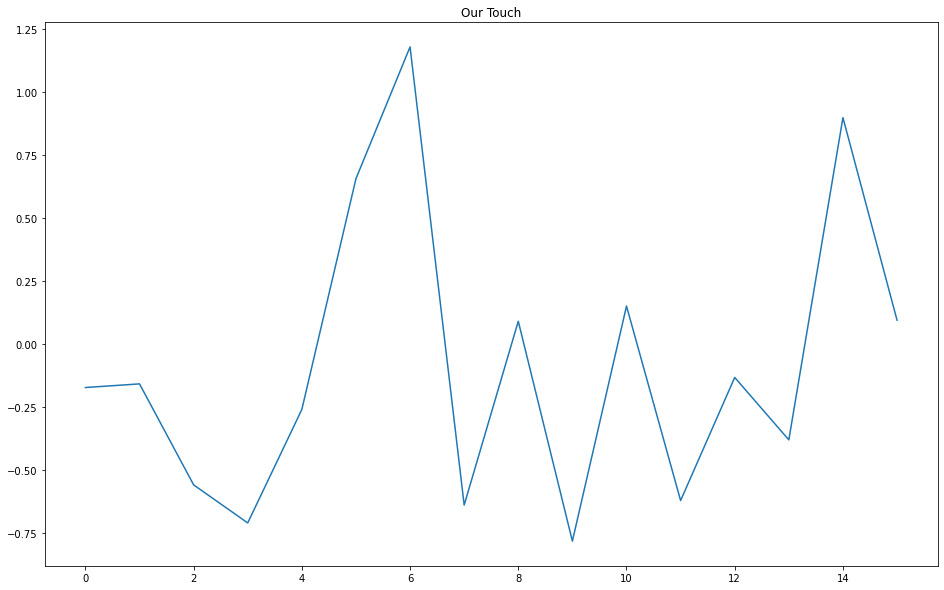

In [244]:
sample = X_train.iloc[20]

plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title("Our Touch")
plt.show()

# so may normalize the dataset 

In [245]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

expand_dims = tf.expand_dims(inputs, axis=2)

gru = tf.keras.layers.LSTM(16, return_sequences=True)(expand_dims)


flatten = tf.keras.layers.Flatten()(gru)

outputs = tf.keras.layers.Dense(4, activation='softmax')(flatten)


model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model_191"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_192 (InputLayer)      [(None, 16)]              0         
                                                                 
 tf.expand_dims_191 (TFOpLam  (None, 16, 1)            0         
 bda)                                                            
                                                                 
 lstm_191 (LSTM)             (None, 16, 16)            1152      
                                                                 
 flatten_191 (Flatten)       (None, 256)               0         
                                                                 
 dense_191 (Dense)           (None, 4)                 1028      
                                                                 
Total params: 2,180
Trainable params: 2,180
Non-trainable params: 0
_______________________________________________________

In [246]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=1,
    epochs=110,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=30,
            restore_best_weights=True
        )
    ]
)

Epoch 1/110
638/638 [==============================] - 7s 8ms/step - loss: 1.3790 - accuracy: 0.2429 - val_loss: 1.3528 - val_accuracy: 0.3125
Epoch 2/110
638/638 [==============================] - 4s 6ms/step - loss: 1.3512 - accuracy: 0.2586 - val_loss: 1.3339 - val_accuracy: 0.3187
Epoch 3/110
638/638 [==============================] - 4s 6ms/step - loss: 1.3378 - accuracy: 0.2618 - val_loss: 1.3247 - val_accuracy: 0.3063
Epoch 4/110
638/638 [==============================] - 4s 6ms/step - loss: 1.3309 - accuracy: 0.2978 - val_loss: 1.3249 - val_accuracy: 0.3187
Epoch 5/110
638/638 [==============================] - 4s 6ms/step - loss: 1.3227 - accuracy: 0.3025 - val_loss: 1.3189 - val_accuracy: 0.2937
Epoch 6/110
638/638 [==============================] - 4s 6ms/step - loss: 1.3209 - accuracy: 0.3088 - val_loss: 1.3246 - val_accuracy: 0.2688
Epoch 7/110
638/638 [==============================] - 4s 6ms/step - loss: 1.3160 - accuracy: 0.3056 - val_loss: 1.3279 - val_accuracy: 0.3375

In [247]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 32.945%


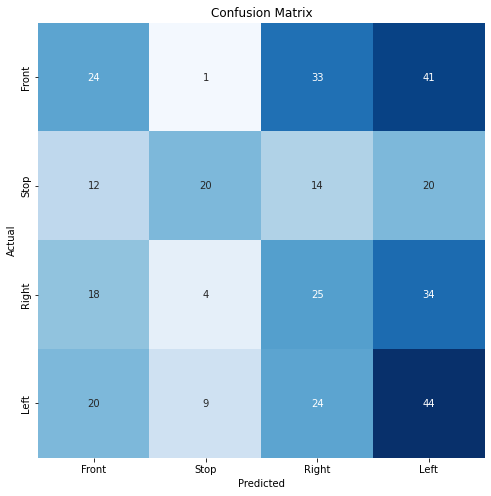

Classification Report:
----------------------
               precision    recall  f1-score   support

       Front       0.32      0.24      0.28        99
        Stop       0.59      0.30      0.40        66
       Right       0.26      0.31      0.28        81
        Left       0.32      0.45      0.37        97

    accuracy                           0.33       343
   macro avg       0.37      0.33      0.33       343
weighted avg       0.36      0.33      0.33       343



In [248]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(4) + 0.5, label_mapping.keys())
plt.yticks(np.arange(4) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

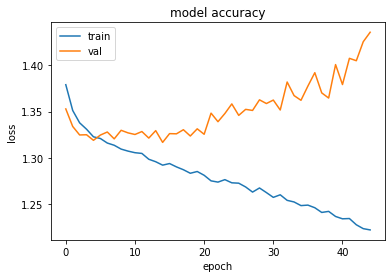

In [249]:
import keras
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

# to Check all

In [34]:
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
label_mapping = {'Front':0, 'Stop':3, 'Right':1, 'Left':2 }

def preprocess_inputs(df):
    df = df.copy()
    
    df['label'] = df['label'].replace(label_mapping)
    
    y = df['label'].copy()
    X = df.drop('label', axis=1).copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
    return X_train, X_test, y_train, y_test

In [32]:
def to_train (X_train, y_train):

  inputs = tf.keras.Input(shape=(X_train.shape[1],))

  expand_dims = tf.expand_dims(inputs, axis=2)

  gru = tf.keras.layers.LSTM(16, return_sequences=True)(expand_dims)


  flatten = tf.keras.layers.Flatten()(gru)

  outputs = tf.keras.layers.Dense(4, activation='softmax')(flatten)

  model = tf.keras.Model(inputs=inputs, outputs=outputs)

  model.compile(
      optimizer='adam',
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
  )

  history = model.fit(
      X_train,
      y_train,
      validation_split=0.2,
      batch_size=1,
      epochs=110,
      callbacks=[
          tf.keras.callbacks.EarlyStopping(
              monitor='val_loss',
              patience=30,
              restore_best_weights=True
          )
      ]
  )

  return model

In [115]:
dataset_folder = 'DatasetC'
users_list = ['1', '2','3', '4','5' '6', '7', '8', '9', '10', '11', '12']
processes_list = ['raw', 'norm', 'stand']

results_df = pd.DataFrame(index = users_list, columns=processes_list)

for user in users_list:
  dataset = get_dataset_raw_signal_resampling(users_list = user
                                            , folders_list = [dataset_folder])
  fs=128
  dataset = preprocessing_data_raw (dataset, fs=fs)

  data_fea_ext = pd.DataFrame()
  dataset_no_label = dataset.drop('label', axis =1)

  stat_features = ['mean', 'var', 'skewness', 'kurtosis', 'hjorth_activity', 'hjorth_complexity', 'abs_mean']
  for fea in stat_features:
    data_fea_ext [fea] =  dataset_no_label.apply (eval(fea), axis=1)

  fd_features = ['petrosian_fd', 'katz_fd', 'higuchi_fd', 'detrended_fluctuation']
  for fea in fd_features:
    data_fea_ext [fea] =  dataset_no_label.apply (eval(fea), axis=1)

  entropy_features = ['perm_entropy', 'spectral_entropy', 'svd_entropy', 'app_entropy', 'sample_entropy']
  for fea in entropy_features:
    data_fea_ext [fea] =  dataset_no_label.apply (eval(fea), axis=1)

  
  for pro in processes_list:

    if pro == 'raw':

      data_fea_ext_ = data_fea_ext
      data = pd.concat([dataset['label'], data_fea_ext_], axis =1)
      data.dropna(inplace=True)
      X_train, X_test, y_train, y_test = preprocess_inputs(data)
      model = to_train(X_train = X_train, y_train = y_train)
      model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
      results_df.loc[user]['raw'] = model_acc*100


    if pro == 'norm':

      data_fea_ext_=(data_fea_ext-data_fea_ext.min())/(data_fea_ext.max()-data_fea_ext.min())
      data = pd.concat([dataset['label'], data_fea_ext_], axis =1)
      data.dropna(inplace=True)
      X_train, X_test, y_train, y_test = preprocess_inputs(data)
      model = to_train(X_train = X_train, y_train = y_train)
      model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
      results_df.loc[user]['norm'] = model_acc*100


    if pro == 'stand':
      

      scaler = preprocessing.StandardScaler().fit(data_fea_ext)
      data_fea_ext = scaler.transform(data_fea_ext)
      data_fea_ext_ = pd.DataFrame(data_fea_ext)

      data = pd.concat([dataset['label'], data_fea_ext_], axis =1)
      data.dropna(inplace=True)
      X_train, X_test, y_train, y_test = preprocess_inputs(data)
      model = to_train(X_train = X_train, y_train = y_train)
      model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
      results_df.loc[user]['stand'] = model_acc*100




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in multiply


Epoch 1/110
64/64 [==============================] - 3s 18ms/step - loss: 1.4107 - accuracy: 0.2656 - val_loss: 1.4239 - val_accuracy: 0.1176
Epoch 2/110
64/64 [==============================] - 0s 7ms/step - loss: 1.3652 - accuracy: 0.2969 - val_loss: 1.5231 - val_accuracy: 0.1176
Epoch 3/110
64/64 [==============================] - 0s 6ms/step - loss: 1.4006 - accuracy: 0.3438 - val_loss: 1.5361 - val_accuracy: 0.1176
Epoch 4/110
64/64 [==============================] - 0s 7ms/step - loss: 1.3690 - accuracy: 0.3125 - val_loss: 1.3996 - val_accuracy: 0.1765
Epoch 5/110
64/64 [==============================] - 0s 7ms/step - loss: 1.3828 - accuracy: 0.3125 - val_loss: 1.5115 - val_accuracy: 0.1176
Epoch 6/110
64/64 [==============================] - 0s 7ms/step - loss: 1.3927 - accuracy: 0.3594 - val_loss: 1.4778 - val_accuracy: 0.1176
Epoch 7/110
64/64 [==============================] - 0s 6ms/step - loss: 1.3732 - accuracy: 0.3125 - val_loss: 1.5050 - val_accuracy: 0.1176
Epoch 8/110


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in multiply


Epoch 1/110
65/65 [==============================] - 3s 16ms/step - loss: 1.4106 - accuracy: 0.3231 - val_loss: 1.4066 - val_accuracy: 0.2353
Epoch 2/110
65/65 [==============================] - 0s 7ms/step - loss: 1.3912 - accuracy: 0.2308 - val_loss: 1.4593 - val_accuracy: 0.2353
Epoch 3/110
65/65 [==============================] - 0s 7ms/step - loss: 1.3732 - accuracy: 0.3538 - val_loss: 1.4345 - val_accuracy: 0.2353
Epoch 4/110
65/65 [==============================] - 1s 8ms/step - loss: 1.3855 - accuracy: 0.3385 - val_loss: 1.4335 - val_accuracy: 0.2353
Epoch 5/110
65/65 [==============================] - 0s 7ms/step - loss: 1.3667 - accuracy: 0.3538 - val_loss: 1.4364 - val_accuracy: 0.2353
Epoch 6/110
65/65 [==============================] - 0s 7ms/step - loss: 1.3667 - accuracy: 0.3538 - val_loss: 1.4166 - val_accuracy: 0.2353
Epoch 7/110
65/65 [==============================] - 0s 7ms/step - loss: 1.3740 - accuracy: 0.3538 - val_loss: 1.4176 - val_accuracy: 0.2353
Epoch 8/110


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in multiply


Epoch 1/110
65/65 [==============================] - 3s 16ms/step - loss: 1.4187 - accuracy: 0.2462 - val_loss: 1.4048 - val_accuracy: 0.3529
Epoch 2/110
65/65 [==============================] - 0s 7ms/step - loss: 1.3875 - accuracy: 0.2615 - val_loss: 1.3985 - val_accuracy: 0.1765
Epoch 3/110
65/65 [==============================] - 0s 6ms/step - loss: 1.4004 - accuracy: 0.3231 - val_loss: 1.3961 - val_accuracy: 0.2941
Epoch 4/110
65/65 [==============================] - 0s 7ms/step - loss: 1.3761 - accuracy: 0.2462 - val_loss: 1.4198 - val_accuracy: 0.2353
Epoch 5/110
65/65 [==============================] - 0s 7ms/step - loss: 1.3708 - accuracy: 0.2154 - val_loss: 1.3809 - val_accuracy: 0.1176
Epoch 6/110
65/65 [==============================] - 0s 7ms/step - loss: 1.3789 - accuracy: 0.2769 - val_loss: 1.4084 - val_accuracy: 0.1765
Epoch 7/110
65/65 [==============================] - 0s 7ms/step - loss: 1.3631 - accuracy: 0.3385 - val_loss: 1.4294 - val_accuracy: 0.2353
Epoch 8/110


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in multiply


Epoch 1/110
66/66 [==============================] - 3s 17ms/step - loss: 1.4263 - accuracy: 0.2121 - val_loss: 1.4194 - val_accuracy: 0.2353
Epoch 2/110
66/66 [==============================] - 0s 7ms/step - loss: 1.4129 - accuracy: 0.2879 - val_loss: 1.4017 - val_accuracy: 0.1765
Epoch 3/110
66/66 [==============================] - 0s 7ms/step - loss: 1.3955 - accuracy: 0.3030 - val_loss: 1.4038 - val_accuracy: 0.1765
Epoch 4/110
66/66 [==============================] - 0s 7ms/step - loss: 1.3968 - accuracy: 0.2424 - val_loss: 1.4247 - val_accuracy: 0.1765
Epoch 5/110
66/66 [==============================] - 0s 7ms/step - loss: 1.3941 - accuracy: 0.2576 - val_loss: 1.4283 - val_accuracy: 0.2353
Epoch 6/110
66/66 [==============================] - 0s 6ms/step - loss: 1.3914 - accuracy: 0.3030 - val_loss: 1.3947 - val_accuracy: 0.2353
Epoch 7/110
66/66 [==============================] - 0s 7ms/step - loss: 1.3889 - accuracy: 0.2879 - val_loss: 1.4065 - val_accuracy: 0.1765
Epoch 8/110


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in multiply


Epoch 1/110
136/136 [==============================] - 4s 11ms/step - loss: 1.4244 - accuracy: 0.2500 - val_loss: 1.4169 - val_accuracy: 0.2941
Epoch 2/110
136/136 [==============================] - 1s 7ms/step - loss: 1.4124 - accuracy: 0.2647 - val_loss: 1.4079 - val_accuracy: 0.2059
Epoch 3/110
136/136 [==============================] - 1s 7ms/step - loss: 1.4061 - accuracy: 0.2868 - val_loss: 1.4052 - val_accuracy: 0.2059
Epoch 4/110
136/136 [==============================] - 1s 7ms/step - loss: 1.3846 - accuracy: 0.2500 - val_loss: 1.3961 - val_accuracy: 0.1765
Epoch 5/110
136/136 [==============================] - 1s 6ms/step - loss: 1.3819 - accuracy: 0.2941 - val_loss: 1.4157 - val_accuracy: 0.1765
Epoch 6/110
136/136 [==============================] - 1s 7ms/step - loss: 1.3825 - accuracy: 0.2647 - val_loss: 1.4000 - val_accuracy: 0.2647
Epoch 7/110
136/136 [==============================] - 1s 6ms/step - loss: 1.3798 - accuracy: 0.2794 - val_loss: 1.3981 - val_accuracy: 0.176

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in multiply


Epoch 1/110
71/71 [==============================] - 3s 14ms/step - loss: 1.4552 - accuracy: 0.1549 - val_loss: 1.4283 - val_accuracy: 0.0556
Epoch 2/110
71/71 [==============================] - 0s 7ms/step - loss: 1.4079 - accuracy: 0.2113 - val_loss: 1.3994 - val_accuracy: 0.3889
Epoch 3/110
71/71 [==============================] - 0s 7ms/step - loss: 1.4084 - accuracy: 0.2958 - val_loss: 1.3796 - val_accuracy: 0.3333
Epoch 4/110
71/71 [==============================] - 0s 7ms/step - loss: 1.3987 - accuracy: 0.2535 - val_loss: 1.3674 - val_accuracy: 0.3889
Epoch 5/110
71/71 [==============================] - 1s 7ms/step - loss: 1.3936 - accuracy: 0.2394 - val_loss: 1.3665 - val_accuracy: 0.2778
Epoch 6/110
71/71 [==============================] - 0s 7ms/step - loss: 1.3907 - accuracy: 0.3239 - val_loss: 1.3647 - val_accuracy: 0.3889
Epoch 7/110
71/71 [==============================] - 0s 7ms/step - loss: 1.4042 - accuracy: 0.2113 - val_loss: 1.3761 - val_accuracy: 0.3333
Epoch 8/110


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in multiply


Epoch 1/110
64/64 [==============================] - 3s 17ms/step - loss: 1.4336 - accuracy: 0.2031 - val_loss: 1.4249 - val_accuracy: 0.1765
Epoch 2/110
64/64 [==============================] - 0s 8ms/step - loss: 1.3963 - accuracy: 0.2500 - val_loss: 1.3982 - val_accuracy: 0.1176
Epoch 3/110
64/64 [==============================] - 0s 7ms/step - loss: 1.3958 - accuracy: 0.2188 - val_loss: 1.4189 - val_accuracy: 0.1176
Epoch 4/110
64/64 [==============================] - 0s 7ms/step - loss: 1.3795 - accuracy: 0.2188 - val_loss: 1.3969 - val_accuracy: 0.2353
Epoch 5/110
64/64 [==============================] - 0s 8ms/step - loss: 1.3787 - accuracy: 0.2656 - val_loss: 1.3960 - val_accuracy: 0.1176
Epoch 6/110
64/64 [==============================] - 0s 7ms/step - loss: 1.3725 - accuracy: 0.3125 - val_loss: 1.3931 - val_accuracy: 0.2941
Epoch 7/110
64/64 [==============================] - 0s 7ms/step - loss: 1.3708 - accuracy: 0.2656 - val_loss: 1.4215 - val_accuracy: 0.1176
Epoch 8/110


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in multiply


Epoch 1/110
64/64 [==============================] - 3s 18ms/step - loss: 1.4171 - accuracy: 0.2656 - val_loss: 1.4712 - val_accuracy: 0.1765
Epoch 2/110
64/64 [==============================] - 0s 6ms/step - loss: 1.3841 - accuracy: 0.2188 - val_loss: 1.5208 - val_accuracy: 0.2941
Epoch 3/110
64/64 [==============================] - 0s 7ms/step - loss: 1.3815 - accuracy: 0.3125 - val_loss: 1.4665 - val_accuracy: 0.1765
Epoch 4/110
64/64 [==============================] - 0s 7ms/step - loss: 1.3825 - accuracy: 0.2500 - val_loss: 1.4867 - val_accuracy: 0.1765
Epoch 5/110
64/64 [==============================] - 0s 7ms/step - loss: 1.3772 - accuracy: 0.2031 - val_loss: 1.4682 - val_accuracy: 0.1765
Epoch 6/110
64/64 [==============================] - 0s 7ms/step - loss: 1.3696 - accuracy: 0.3125 - val_loss: 1.4756 - val_accuracy: 0.2353
Epoch 7/110
64/64 [==============================] - 0s 7ms/step - loss: 1.3718 - accuracy: 0.3125 - val_loss: 1.5028 - val_accuracy: 0.1765
Epoch 8/110


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in multiply


Epoch 1/110
64/64 [==============================] - 3s 17ms/step - loss: 1.4018 - accuracy: 0.2500 - val_loss: 1.5544 - val_accuracy: 0.1176
Epoch 2/110
64/64 [==============================] - 0s 7ms/step - loss: 1.3838 - accuracy: 0.2812 - val_loss: 1.4725 - val_accuracy: 0.1176
Epoch 3/110
64/64 [==============================] - 0s 7ms/step - loss: 1.3829 - accuracy: 0.3594 - val_loss: 1.4578 - val_accuracy: 0.1765
Epoch 4/110
64/64 [==============================] - 0s 7ms/step - loss: 1.3729 - accuracy: 0.2969 - val_loss: 1.5359 - val_accuracy: 0.1176
Epoch 5/110
64/64 [==============================] - 0s 7ms/step - loss: 1.3887 - accuracy: 0.2969 - val_loss: 1.5221 - val_accuracy: 0.1176
Epoch 6/110
64/64 [==============================] - 0s 7ms/step - loss: 1.3732 - accuracy: 0.3125 - val_loss: 1.6311 - val_accuracy: 0.1176
Epoch 7/110
64/64 [==============================] - 0s 7ms/step - loss: 1.3652 - accuracy: 0.3594 - val_loss: 1.5512 - val_accuracy: 0.1176
Epoch 8/110


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in multiply


Epoch 1/110
64/64 [==============================] - 4s 17ms/step - loss: 1.3887 - accuracy: 0.2969 - val_loss: 1.5108 - val_accuracy: 0.1176
Epoch 2/110
64/64 [==============================] - 0s 6ms/step - loss: 1.3846 - accuracy: 0.3438 - val_loss: 1.5464 - val_accuracy: 0.1176
Epoch 3/110
64/64 [==============================] - 0s 7ms/step - loss: 1.3728 - accuracy: 0.2656 - val_loss: 1.5618 - val_accuracy: 0.1176
Epoch 4/110
64/64 [==============================] - 0s 7ms/step - loss: 1.3730 - accuracy: 0.3281 - val_loss: 1.5012 - val_accuracy: 0.1176
Epoch 5/110
64/64 [==============================] - 0s 7ms/step - loss: 1.3723 - accuracy: 0.3438 - val_loss: 1.4729 - val_accuracy: 0.1176
Epoch 6/110
64/64 [==============================] - 0s 7ms/step - loss: 1.3772 - accuracy: 0.3438 - val_loss: 1.5599 - val_accuracy: 0.1176
Epoch 7/110
64/64 [==============================] - 0s 7ms/step - loss: 1.3719 - accuracy: 0.3594 - val_loss: 1.5048 - val_accuracy: 0.1765
Epoch 8/110


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in multiply


Epoch 1/110
130/130 [==============================] - 3s 11ms/step - loss: 1.4158 - accuracy: 0.2538 - val_loss: 1.3656 - val_accuracy: 0.3333
Epoch 2/110
130/130 [==============================] - 1s 7ms/step - loss: 1.3959 - accuracy: 0.2615 - val_loss: 1.3778 - val_accuracy: 0.1818
Epoch 3/110
130/130 [==============================] - 1s 8ms/step - loss: 1.3852 - accuracy: 0.2692 - val_loss: 1.3667 - val_accuracy: 0.3636
Epoch 4/110
130/130 [==============================] - 1s 8ms/step - loss: 1.3837 - accuracy: 0.2846 - val_loss: 1.3641 - val_accuracy: 0.2727
Epoch 5/110
130/130 [==============================] - 1s 7ms/step - loss: 1.3913 - accuracy: 0.2154 - val_loss: 1.3714 - val_accuracy: 0.2727
Epoch 6/110
130/130 [==============================] - 1s 7ms/step - loss: 1.3695 - accuracy: 0.2846 - val_loss: 1.3632 - val_accuracy: 0.2727
Epoch 7/110
130/130 [==============================] - 1s 7ms/step - loss: 1.3686 - accuracy: 0.2692 - val_loss: 1.3738 - val_accuracy: 0.303

In [118]:
results_df

,raw,norm,stand
1,42.857143,25.714287,22.857143
2,13.88889,13.88889,30.555555
3,33.333334,22.222222,27.777779
4,19.444445,25.0,16.666667
56,31.08108,25.675675,21.621622
7,17.948718,33.333334,35.897437
8,25.0,27.777779,30.555555
9,22.222222,27.777779,27.777779
10,25.714287,25.714287,22.857143
11,25.714287,25.714287,37.142858


In [119]:
results_df.to_csv('all_users_lstm16_datasetc.csv')